# Multi-class Classification models for dry beans data set

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


import tensorflow as tf
np.random.seed(123)
tf.random.set_seed(1234)
import os
os.environ['PYTHONHASHSEED']= '0'
np.random.seed(1)
import random as rn
rn.seed(1)

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the dry beans dataset

dry_beans = pd.read_excel('Dry_Bean_Dataset.xlsx')


In [4]:
# Exploring the dataset: viewing the first few observations

dry_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
# Exploring the dataset: viewing the last few observations
dry_beans.tail()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [6]:
# Exploring the dataset: viewing the number of rows and columns of the shape of the dadaset

dry_beans.shape

(13611, 17)

In [7]:
# Exploring the dataset: understaing the data type of each feature

dry_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [8]:
# Exploring the dataset: viewing the descriptive statistics of the dataset

dry_beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [9]:
# Exploring the dataset: checking for missing value
dry_beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

<AxesSubplot:>

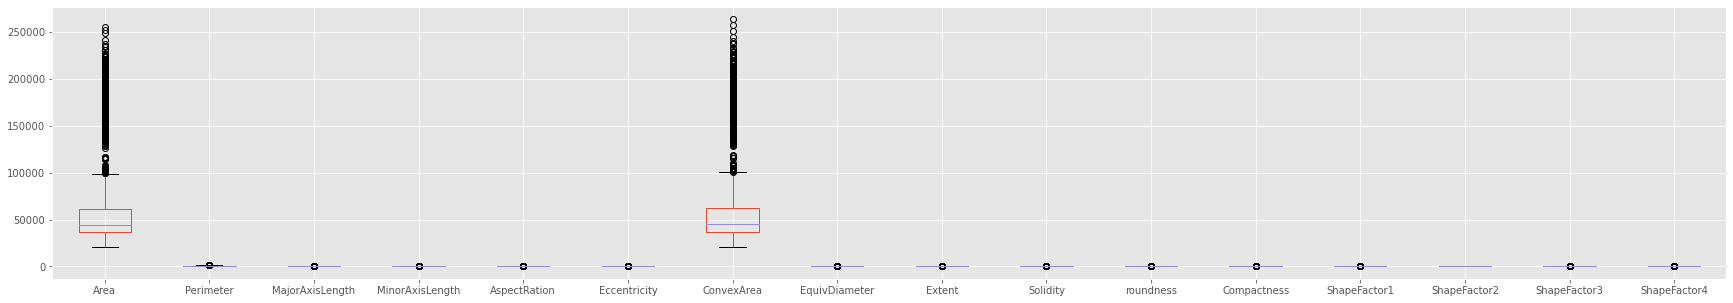

In [10]:
# Exploring dataset: checking for outlier
dry_beans.iloc[:,0:-1].boxplot(figsize=(30, 5))

In [11]:
# Exploring dataset: number of observations in each variable with outlier
q1 = dry_beans.quantile(0.25)
q3 = dry_beans.quantile(0.75)
iqr = q3 - q1
((dry_beans > (1.5*iqr + q3)) | (dry_beans < (q1 - 1.5*iqr))).sum()

Area               551
AspectRation       473
Class                0
Compactness        109
ConvexArea         550
Eccentricity       843
EquivDiameter      526
Extent             275
MajorAxisLength    379
MinorAxisLength    569
Perimeter          500
ShapeFactor1       533
ShapeFactor2         0
ShapeFactor3       195
ShapeFactor4       767
Solidity           778
roundness           91
dtype: int64

In [4]:
# Selecting the independent X variables and the dependent y variable
X = dry_beans.iloc[:, 0:-1]
y = dry_beans.iloc[:,-1]

In [5]:
# Exploring dataset: getting the various possible class lables of the dependent variable so as to convert them to integers

y.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
# Transforming the Class variable from categirical to numeric form   

y.replace(to_replace=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'], 
          value=[0,1,2,3,4,5,6], inplace=True)


In [7]:
y.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [8]:
X.shape, y.shape

((13611, 16), (13611,))

In [9]:
# Spliting the dataset into train and test using 80:20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10888, 16), (2723, 16), (10888,), (2723,))

In [11]:
# Normalizing the data to avoid the dominance of observations with higher magnitude during training

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<AxesSubplot:xlabel='Class', ylabel='count'>

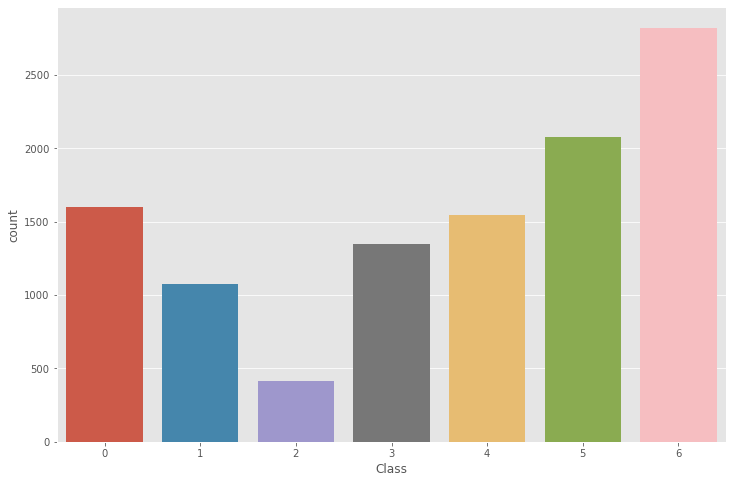

In [12]:
# Exploring the dependent y varibale to view how the class labels are distributed - looking for class imbalance
sns.countplot(y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

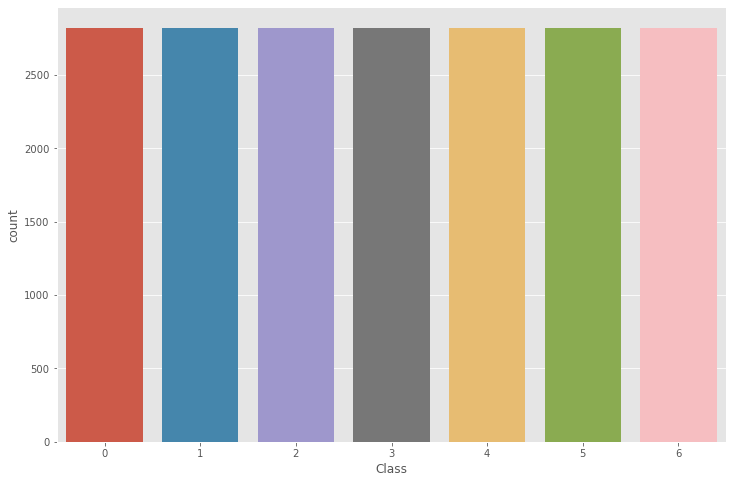

In [13]:
# Balancing the class to avoid bias by dominant class 

resampler = RandomOverSampler(random_state=100)
X_train_sampled, y_train_sampled = resampler.fit_resample(X_train, y_train)

sns.countplot(y_train_sampled)

# KNN Model

In [43]:
#model with default hyperparameter
model1 = KNeighborsClassifier()
model1 = model1.fit(X_train_sampled, y_train_sampled)

In [44]:
# performance evaluation
y_pred = model1.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:{:.3f}\n\n'.format(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.913


Confusion Matrix:
[[401   5   0   0   0  13   5]
 [  0 225   1  15   1   7   0]
 [  0   0 109   0   0   0   0]
 [  1  11   0 264   3   0   0]
 [  0   1   0  10 361  10   0]
 [ 16   7   0   1  10 474  48]
 [ 11   0   0   0   8  52 653]] 


--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       424
           1       0.90      0.90      0.90       249
           2       0.99      1.00      1.00       109
           3       0.91      0.95      0.93       279
           4       0.94      0.95      0.94       382
           5       0.85      0.85      0.85       556
           6       0.92      0.90      0.91       724

    accuracy                           0.91      2723
   macro avg       0.92      0.93      0.93      2723
weighted avg       0.91      0.91      0.91      2723



In [51]:
# using cross validation
model1 = KNeighborsClassifier()
scores_knn1 = cross_val_score(model2, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')

In [52]:
# performance evaluation

y_pred = cross_val_predict(model1, X_test, y_test, cv=5)

# Compute the confusion matrix for the overall cross-validation results
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}".format(scores_knn1.mean()))
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy: 0.94
Confusion Matrix:
[[397   2   0   0   0  20   5]
 [  1 217   1  20   2   8   0]
 [  0   0 109   0   0   0   0]
 [  1  10   0 262   6   0   0]
 [  0   1   0   7 363   9   2]
 [ 13   3   0   0   8 468  64]
 [ 14   0   0   0   2  45 663]] 


--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       424
           1       0.93      0.87      0.90       249
           2       0.99      1.00      1.00       109
           3       0.91      0.94      0.92       279
           4       0.95      0.95      0.95       382
           5       0.85      0.84      0.85       556
           6       0.90      0.92      0.91       724

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [18]:
# KNN hyperparameter tuning

for i in range(5, 31):
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    model = model.fit(X_train_sampled, y_train_sampled)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print('neighbor: {} accuracy: {:.3f}'.format(i, acc))

neighbor: 5 accuracy: 0.913
neighbor: 6 accuracy: 0.907
neighbor: 7 accuracy: 0.914
neighbor: 8 accuracy: 0.912
neighbor: 9 accuracy: 0.915
neighbor: 10 accuracy: 0.916
neighbor: 11 accuracy: 0.917
neighbor: 12 accuracy: 0.918
neighbor: 13 accuracy: 0.920
neighbor: 14 accuracy: 0.917
neighbor: 15 accuracy: 0.918
neighbor: 16 accuracy: 0.920
neighbor: 17 accuracy: 0.919
neighbor: 18 accuracy: 0.920
neighbor: 19 accuracy: 0.921
neighbor: 20 accuracy: 0.922
neighbor: 21 accuracy: 0.921
neighbor: 22 accuracy: 0.924
neighbor: 23 accuracy: 0.924
neighbor: 24 accuracy: 0.924
neighbor: 25 accuracy: 0.924
neighbor: 26 accuracy: 0.923
neighbor: 27 accuracy: 0.923
neighbor: 28 accuracy: 0.922
neighbor: 29 accuracy: 0.922
neighbor: 30 accuracy: 0.921


In [48]:
#model with hyperparameter tuning
model2 = KNeighborsClassifier(n_neighbors=22)
model2 = model2.fit(X_train_sampled, y_train_sampled)

In [49]:
# performance evaluation
y_pred = model2.predict(X_test)

acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:{:.3f}\n\n'.format(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.924


Confusion Matrix:
[[402   3   0   0   0  14   5]
 [  0 224   0  16   2   7   0]
 [  0   0 109   0   0   0   0]
 [  1   5   0 269   4   0   0]
 [  0   1   0   7 366   7   1]
 [ 13   3   0   0   8 492  40]
 [ 12   1   0   0   4  53 654]] 


--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       424
           1       0.95      0.90      0.92       249
           2       1.00      1.00      1.00       109
           3       0.92      0.96      0.94       279
           4       0.95      0.96      0.96       382
           5       0.86      0.88      0.87       556
           6       0.93      0.90      0.92       724

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



In [53]:
# model with hyperparameter tuned and use of cross validation
model2 = KNeighborsClassifier(n_neighbors=22)
scores_knn2 = cross_val_score(model2, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')

In [54]:
# performance evaluation

y_pred = cross_val_predict(model2, X_test, y_test, cv=5)

# Compute the confusion matrix for the overall cross-validation results
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}".format(scores_knn2.mean()))
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Accuracy: 0.94
Confusion Matrix:
[[394   3   0   0   0  18   9]
 [  1 202   0  30   2  14   0]
 [  0   1 108   0   0   0   0]
 [  1   7   0 266   5   0   0]
 [  0   1   0   4 366   8   3]
 [ 11   1   0   0   5 485  54]
 [ 13   0   0   0   2  46 663]] 


--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       424
           1       0.94      0.81      0.87       249
           2       1.00      0.99      1.00       109
           3       0.89      0.95      0.92       279
           4       0.96      0.96      0.96       382
           5       0.85      0.87      0.86       556
           6       0.91      0.92      0.91       724

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



# ANN Model

In [31]:
# plotting training set accuracy against epoch to determine the optimum value for epoch
accuracy = ann_model.history['accuracy']
validation_accuracy = ann_model.history['val_accuracy'] 
plt.plot(accuracy, label='Training Set Accuracy') 
plt.plot(validation_accuracy, label='Validation Set Accuracy') 
plt.ylabel('Accuracy') 
plt.ylim([min(plt.ylim()),1]) 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

In [30]:
# plotting training set loss against epoch to determine the optimum value for epoch
loss = ann_model.history['loss'] 
validation_loss = ann_model.history['val_loss'] 
plt.plot(loss, label='Training Set Loss') 
plt.plot(validation_loss, label='Validation Set Loss') 
plt.ylabel('Loss') 
plt.title('Training and Validation Accuracy Across Epochs') 
plt.legend()

In [55]:
# ANN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu', input_shape=(16,))) 
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(7,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') 
ann_model = model.fit(X_train_sampled, y_train_sampled, batch_size = 100, verbose=2, epochs= 25, validation_split=0.2)



Epoch 1/25
159/159 - 1s - loss: 1.2605 - accuracy: 0.6245 - val_loss: 1.0196 - val_accuracy: 0.4538 - 1s/epoch - 9ms/step
Epoch 2/25
159/159 - 0s - loss: 0.4841 - accuracy: 0.8681 - val_loss: 0.5264 - val_accuracy: 0.8160 - 328ms/epoch - 2ms/step
Epoch 3/25
159/159 - 0s - loss: 0.3281 - accuracy: 0.8928 - val_loss: 0.4095 - val_accuracy: 0.8608 - 290ms/epoch - 2ms/step
Epoch 4/25
159/159 - 0s - loss: 0.2883 - accuracy: 0.8976 - val_loss: 0.3508 - val_accuracy: 0.8848 - 286ms/epoch - 2ms/step
Epoch 5/25
159/159 - 0s - loss: 0.2726 - accuracy: 0.8995 - val_loss: 0.3619 - val_accuracy: 0.8714 - 281ms/epoch - 2ms/step
Epoch 6/25
159/159 - 0s - loss: 0.2574 - accuracy: 0.9074 - val_loss: 0.3359 - val_accuracy: 0.8919 - 301ms/epoch - 2ms/step
Epoch 7/25
159/159 - 0s - loss: 0.2507 - accuracy: 0.9091 - val_loss: 0.3431 - val_accuracy: 0.8813 - 316ms/epoch - 2ms/step
Epoch 8/25
159/159 - 0s - loss: 0.2406 - accuracy: 0.9150 - val_loss: 0.2815 - val_accuracy: 0.9152 - 342ms/epoch - 2ms/step
Epo

In [61]:
# Performance Report
y_pred = model.predict(X_test) 
y_pred = y_pred.argmax(axis=1)
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:{:.3f}\n\n'.format(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

86/86 [==============================] - 0s 1ms/step
accuracy:0.921


Confusion Matrix:
[[402   3   0   0   0  15   4]
 [  2 224   1  15   0   7   0]
 [  0   0 109   0   0   0   0]
 [  1   5   0 271   2   0   0]
 [  0   2   0   6 362   9   3]
 [ 20   1   0   0   8 482  45]
 [ 18   0   0   0   1  47 658]] 


--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       424
           1       0.95      0.90      0.93       249
           2       0.99      1.00      1.00       109
           3       0.93      0.97      0.95       279
           4       0.97      0.95      0.96       382
           5       0.86      0.87      0.86       556
           6       0.93      0.91      0.92       724

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [62]:
# ANN Model with cross validation

def ann_model():
    # Instantiate model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_dim=16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model.ann = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=ann_model, epochs=25, batch_size=100, verbose=2)

# Cross-validation to compute accuracy scores
scores = cross_val_score(model.ann, X_train_sampled, y_train_sampled, cv=5, scoring='accuracy')


Epoch 1/25
159/159 - 1s - loss: 1.4628 - accuracy: 0.5002 - 765ms/epoch - 5ms/step
Epoch 2/25
159/159 - 0s - loss: 0.6285 - accuracy: 0.8367 - 227ms/epoch - 1ms/step
Epoch 3/25
159/159 - 0s - loss: 0.3603 - accuracy: 0.8935 - 222ms/epoch - 1ms/step
Epoch 4/25
159/159 - 0s - loss: 0.2886 - accuracy: 0.9048 - 220ms/epoch - 1ms/step
Epoch 5/25
159/159 - 0s - loss: 0.2601 - accuracy: 0.9105 - 223ms/epoch - 1ms/step
Epoch 6/25
159/159 - 0s - loss: 0.2440 - accuracy: 0.9156 - 216ms/epoch - 1ms/step
Epoch 7/25
159/159 - 0s - loss: 0.2341 - accuracy: 0.9175 - 210ms/epoch - 1ms/step
Epoch 8/25
159/159 - 0s - loss: 0.2233 - accuracy: 0.9232 - 225ms/epoch - 1ms/step
Epoch 9/25
159/159 - 0s - loss: 0.2190 - accuracy: 0.9249 - 223ms/epoch - 1ms/step
Epoch 10/25
159/159 - 0s - loss: 0.2114 - accuracy: 0.9270 - 211ms/epoch - 1ms/step
Epoch 11/25
159/159 - 0s - loss: 0.2139 - accuracy: 0.9262 - 213ms/epoch - 1ms/step
Epoch 12/25
159/159 - 0s - loss: 0.2047 - accuracy: 0.9285 - 219ms/epoch - 1ms/step
E

Epoch 22/25
159/159 - 0s - loss: 0.2155 - accuracy: 0.9224 - 206ms/epoch - 1ms/step
Epoch 23/25
159/159 - 0s - loss: 0.2129 - accuracy: 0.9233 - 204ms/epoch - 1ms/step
Epoch 24/25
159/159 - 0s - loss: 0.2130 - accuracy: 0.9236 - 228ms/epoch - 1ms/step
Epoch 25/25
159/159 - 0s - loss: 0.2122 - accuracy: 0.9234 - 252ms/epoch - 2ms/step
124/124 [==============================] - 0s 1ms/step
Epoch 1/25
159/159 - 1s - loss: 1.4725 - accuracy: 0.5614 - 1s/epoch - 8ms/step
Epoch 2/25
159/159 - 0s - loss: 0.6606 - accuracy: 0.7976 - 294ms/epoch - 2ms/step
Epoch 3/25
159/159 - 0s - loss: 0.3856 - accuracy: 0.8828 - 289ms/epoch - 2ms/step
Epoch 4/25
159/159 - 0s - loss: 0.3069 - accuracy: 0.8936 - 303ms/epoch - 2ms/step
Epoch 5/25
159/159 - 0s - loss: 0.2761 - accuracy: 0.8987 - 258ms/epoch - 2ms/step
Epoch 6/25
159/159 - 0s - loss: 0.2578 - accuracy: 0.9073 - 305ms/epoch - 2ms/step
Epoch 7/25
159/159 - 0s - loss: 0.2482 - accuracy: 0.9097 - 276ms/epoch - 2ms/step
Epoch 8/25
159/159 - 0s - loss:

In [63]:
# performance evaluation

y_pred = cross_val_predict(model.ann, X_test, y_test, cv=5)

# Compute the confusion matrix for the overall cross-validation results
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}".format(scores.mean()))
print('Confusion Matrix:')
print(cm,'\n\n')
print('--------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

Epoch 1/25
22/22 - 1s - loss: 1.8911 - accuracy: 0.1552 - 563ms/epoch - 26ms/step
Epoch 2/25
22/22 - 0s - loss: 1.7986 - accuracy: 0.4036 - 46ms/epoch - 2ms/step
Epoch 3/25
22/22 - 0s - loss: 1.7022 - accuracy: 0.5161 - 40ms/epoch - 2ms/step
Epoch 4/25
22/22 - 0s - loss: 1.5821 - accuracy: 0.5188 - 36ms/epoch - 2ms/step
Epoch 5/25
22/22 - 0s - loss: 1.4439 - accuracy: 0.5367 - 37ms/epoch - 2ms/step
Epoch 6/25
22/22 - 0s - loss: 1.2961 - accuracy: 0.5542 - 36ms/epoch - 2ms/step
Epoch 7/25
22/22 - 0s - loss: 1.1558 - accuracy: 0.6185 - 37ms/epoch - 2ms/step
Epoch 8/25
22/22 - 0s - loss: 1.0266 - accuracy: 0.6882 - 40ms/epoch - 2ms/step
Epoch 9/25
22/22 - 0s - loss: 0.9136 - accuracy: 0.7388 - 36ms/epoch - 2ms/step
Epoch 10/25
22/22 - 0s - loss: 0.8192 - accuracy: 0.7764 - 37ms/epoch - 2ms/step
Epoch 11/25
22/22 - 0s - loss: 0.7396 - accuracy: 0.7989 - 34ms/epoch - 2ms/step
Epoch 12/25
22/22 - 0s - loss: 0.6749 - accuracy: 0.8085 - 37ms/epoch - 2ms/step
Epoch 13/25
22/22 - 0s - loss: 0.62

17/17 [==============================] - 0s 1ms/step
Epoch 1/25
22/22 - 1s - loss: 1.9076 - accuracy: 0.2607 - 660ms/epoch - 30ms/step
Epoch 2/25
22/22 - 0s - loss: 1.8352 - accuracy: 0.2602 - 35ms/epoch - 2ms/step
Epoch 3/25
22/22 - 0s - loss: 1.7601 - accuracy: 0.2602 - 35ms/epoch - 2ms/step
Epoch 4/25
22/22 - 0s - loss: 1.6797 - accuracy: 0.2602 - 34ms/epoch - 2ms/step
Epoch 5/25
22/22 - 0s - loss: 1.5926 - accuracy: 0.2602 - 33ms/epoch - 1ms/step
Epoch 6/25
22/22 - 0s - loss: 1.5028 - accuracy: 0.2905 - 34ms/epoch - 2ms/step
Epoch 7/25
22/22 - 0s - loss: 1.4078 - accuracy: 0.3575 - 37ms/epoch - 2ms/step
Epoch 8/25
22/22 - 0s - loss: 1.3095 - accuracy: 0.3947 - 32ms/epoch - 1ms/step
Epoch 9/25
22/22 - 0s - loss: 1.2040 - accuracy: 0.4819 - 34ms/epoch - 2ms/step
Epoch 10/25
22/22 - 0s - loss: 1.0587 - accuracy: 0.6728 - 34ms/epoch - 2ms/step
Epoch 11/25
22/22 - 0s - loss: 0.9292 - accuracy: 0.7302 - 35ms/epoch - 2ms/step
Epoch 12/25
22/22 - 0s - loss: 0.8175 - accuracy: 0.7471 - 35ms

# Ensemble

In [64]:
# importing libraries

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict


# Create three different base estimators
estimators = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(max_depth=1))
]

# Create a bagging classifier with a decision tree base estimator
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=100)

# Create an AdaBoost classifier with a decision tree base estimator
boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=100)

# Create a stacking classifier with the base estimators and a logistic regression meta-estimator
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)

# Evaluate the performance of the bagging classifier using 5-fold cross-validation
bagging_scores = cross_val_score(bagging, X_train_sampled, y_train_sampled, cv=5)
print("Bagging scores: {}".format(bagging_scores))
print("Bagging accuracy: {:.2f}%".format(bagging_scores.mean() * 100 ))

# Evaluate the performance of the boosting classifier using 5-fold cross-validation
boosting_scores = cross_val_score(boosting, X_train_sampled, y_train_sampled, cv=5)
print("Boosting scores: {}".format(boosting_scores))
print("Boosting accuracy: {:.2f}%".format(boosting_scores.mean() * 100 ))

# Evaluate the performance of the stacking classifier using 5-fold cross-validation
stacking_scores = cross_val_score(stacking, X_train_sampled, y_train_sampled, cv=5)
print("Stacking scores: {}".format(stacking_scores))
print("Stacking accuracy: {:.2f}%".format(stacking_scores.mean() * 100))


Bagging scores: [0.95874462 0.95722602 0.96481903 0.97064034 0.98455696]
Bagging accuracy: 96.72%
Boosting scores: [0.95342951 0.95064541 0.95089851 0.96532523 0.98278481]
Boosting accuracy: 96.06%
Stacking scores: [0.94254619 0.93874968 0.94001519 0.93925588 0.94936709]
Stacking accuracy: 94.20%
